# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.

> Instructor Notes:
- This walks the students through a sample dataset, they should actually do it on the full dataset they have created as part of Project 6.
- The code for this lab is shorter than usual in order to give the students time to practice with Tableau.

## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

In [57]:
imdb = pd.read_csv('imdbb.csv', sep='\t')

## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

In [67]:
#random columns
#imdb = imdb.drop('Unnamed: 0',1)
imdb = imdb.drop('Rated',1)

In [101]:

#create features and target
y = imdb['imdbRating']
X = imdb.iloc[:,20:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)




Cross val score:  [-0.40006796 -0.63958763 -1.55617585]


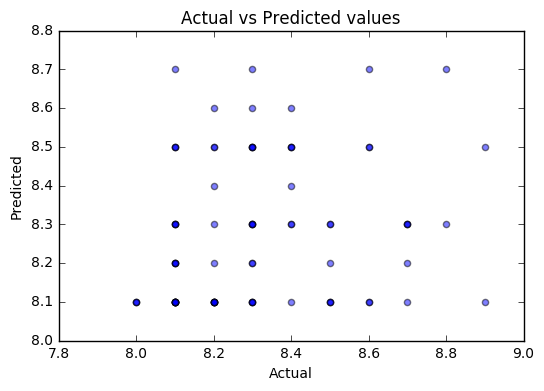

Average R^2 coefficient:  -0.386447103424


In [118]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

cvs = cross_val_score(dt, X_train, y_train)
print "Cross val score: ", cvs
y_pred = dt.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted values")
plt.show()
print "Average R^2 coefficient: ", dt.score(X_test, y_test)

## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

Cross val score:  [ 0.02666731 -0.4540866  -0.28887299]


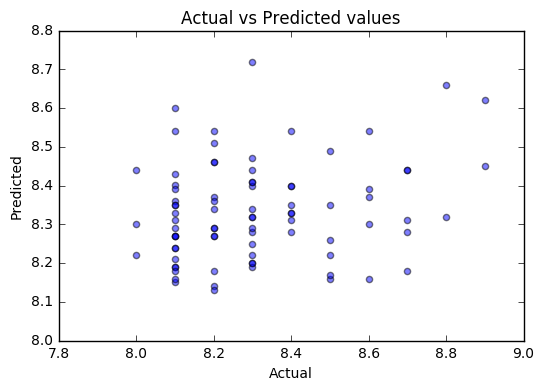

Average R^2 score:  -0.0807895983888
Points are tighter, indicating a better fit


In [121]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
cvs = cross_val_score(rf, X_train, y_train)
print "Cross val score: ", cvs

y_pred = rf.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted values")
plt.show()
print "Average R^2 score: ", rf.score(X_test, y_test)
print "Points are tighter, indicating a better fit"

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

Cross val score:  [ 0.04430547 -0.046728   -0.00386461]


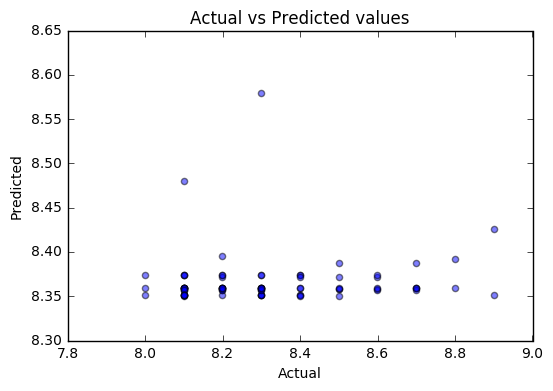

Average R^2 score:  -0.0572400672298
This one is a bit worse than the last


In [122]:
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
cvs = cross_val_score(abr, X_train, y_train)
print "Cross val score: ", cvs

y_pred = abr.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted values")
plt.show()
print "Average R^2 score: ", abr.score(X_test, y_test)
print "This one is a bit worse than the last"

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

Cross val score:  [ 0.01326731 -0.02408475 -0.51181908]


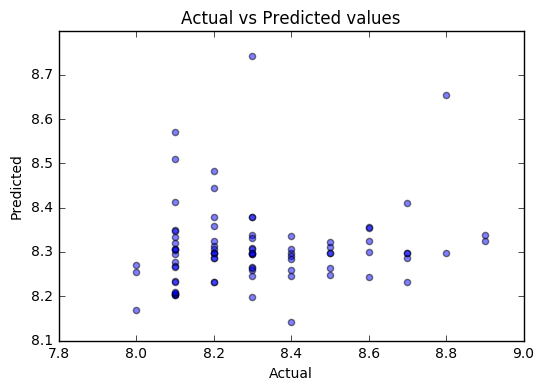

Average R^2 score:  -0.0578177755449
This is the best one, with the tightest points, other than a few outliers
The outliers almost make it worse than the AdaBoost


In [126]:
gbtr = GradientBoostingRegressor()
gbtr.fit(X_train, y_train)
cvs = cross_val_score(gbtr, X_train, y_train)
print "Cross val score: ", cvs

y_pred = gbtr.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted values")
plt.show()
print "Average R^2 score: ", gbtr.score(X_test, y_test)
print "This is the best one, with the tightest points, other than a few outliers"
print "The outliers almost make it worse than the AdaBoost"

## 5. Tableau Practice

Put your data into Tableau. Once it is there, make a new url on your website and upload your new Tableau document to your site. Post your website's URL below.

https://protected-basin-78104.herokuapp.com/site/tableau/sheet1/

I wasn't too sure what to do here, so I made a single sheet and uploaded that.

## Bonus

Take the best model and try to improve it using grid search.